In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [31]:
df = pd.read_csv("Iris.csv")
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [33]:
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

In [35]:
X = df.drop(columns=['Species'])
y = df['Species']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [41]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


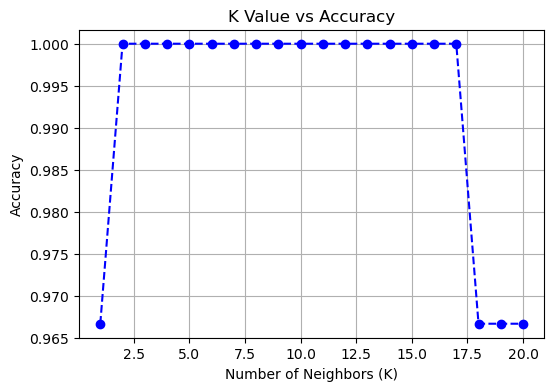

In [45]:
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K Value vs Accuracy")
plt.grid(True)
plt.show()

In [47]:
best_k = k_values[np.argmax(accuracies)]
print(f" Best K: {best_k}, Accuracy: {max(accuracies):.4f}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

 Best K: 2, Accuracy: 1.0000



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


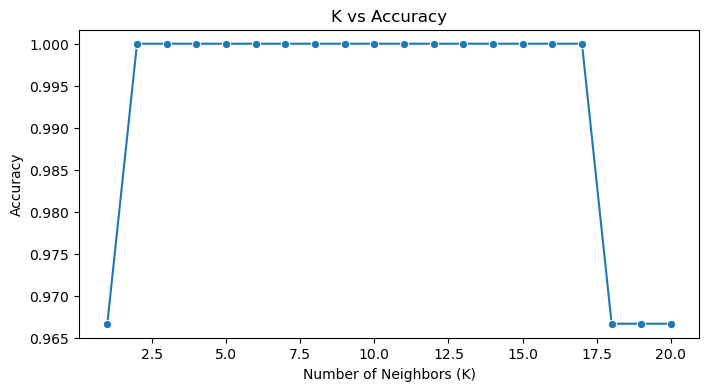

In [49]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

plt.figure(figsize=(8,4))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()

In [51]:
X_2d = X_scaled[:, :2]  # first 2 features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42
)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

KNeighborsClassifier(n_neighbors=2)

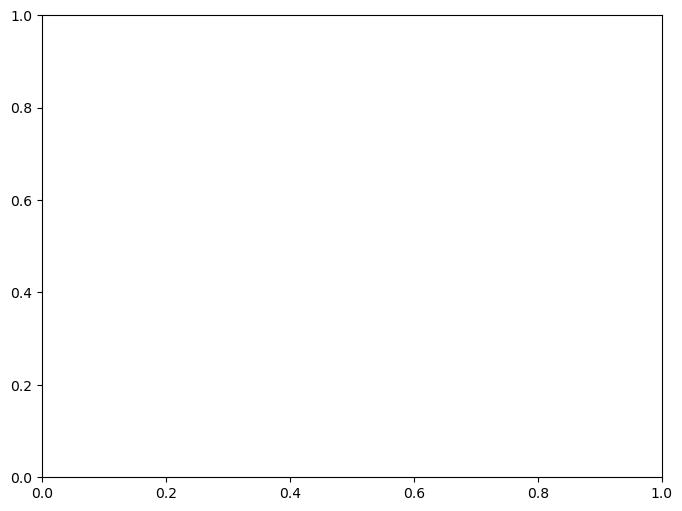

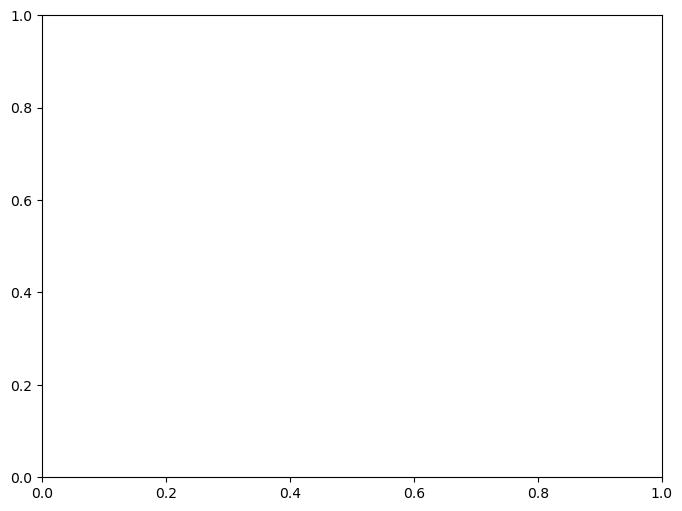

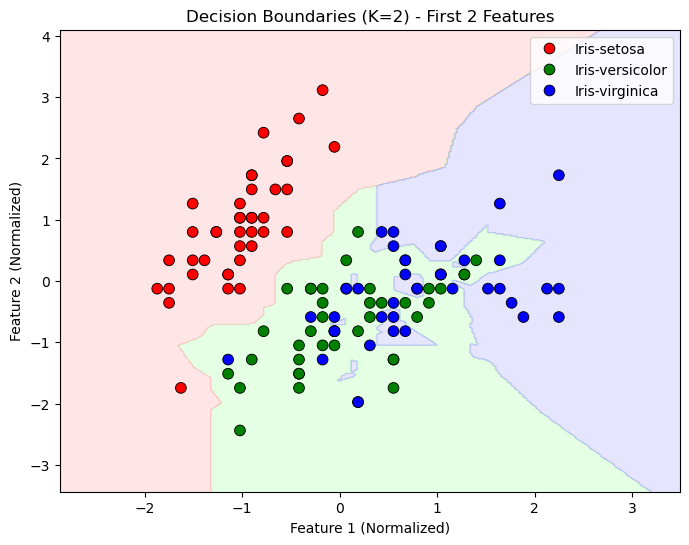

In [57]:
from sklearn.preprocessing import LabelEncoder

# Encode labels into numbers
le = LabelEncoder()
y_train_2d_enc = le.fit_transform(y_train_2d)
y_test_2d_enc = le.transform(y_test_2d)

# Train on encoded labels
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d_enc)

# Mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for grid points
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
sns.scatterplot(
    x=X_train_2d[:, 0], y=X_train_2d[:, 1],
    hue=le.inverse_transform(y_train_2d_enc),  # original labels in legend
    palette=cmap_bold, edgecolor='k', s=60
)
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.title(f"Decision Boundaries (K={best_k}) - First 2 Features")
plt.show()
